In [14]:
import json
import datetime
from pprint import pprint as print
import matplotlib.pyplot as plt
%matplotlib inline

with open('datashades_snapshot.json') as file:
    snapshot_data = json.load(file)

historical_data = []
with open('datashades_historical.json') as file:
    for line in file:
        record = json.loads(line)
        record["CreatedAt"] = datetime.datetime.strptime(record["CreatedAt"]["$date"][:10], "%Y-%m-%d")
        record["_id"] = record["_id"]["$oid"]
        historical_data.append(record)

# Basic information

In [15]:

print(f"{len(snapshot_data['portals'])} in the current snapshot, and {len(historical_data)} in the historical data")

example_record = snapshot_data["portals"][179]

print("Records have these keys")
print([*example_record.keys()])

print("Here is an example record")
print(example_record)

'571 in the current snapshot, and 16876 in the historical data'
'Records have these keys'
['SiteInfo',
 'Coordinates',
 'Version',
 'Plugins',
 'UsersNumber',
 'OrgNumber',
 'DatasetsNumber',
 'ResourcesNumber',
 'Tags',
 '_inProgress',
 '_id',
 'Href',
 'Licenses',
 'Organizations',
 '__v',
 'CreatedAt']
'Here is an example record'
{'Coordinates': {'lat': 2.5, 'lng': 112.5},
 'CreatedAt': '2024-01-11T19:18:18.174Z',
 'DatasetsNumber': 12248,
 'Href': 'https://www.data.gov.my/data/',
 'Licenses': [{'count': 12248,
               'display_name': 'Creative Commons Attribution',
               'name': 'cc-by'}],
 'OrgNumber': 402,
 'Organizations': [{'display_name': 'Agensi Anti Dadah Kebangsaan (AADK)',
                    'name': 'aadk',
                    'package_count': 40,
                    'user_count': 0},
                   {'display_name': 'Agensi Kawalan Sempadan Malaysia (AKSEM)',
                    'name': 'aksem',
                    'package_count': 12,
                

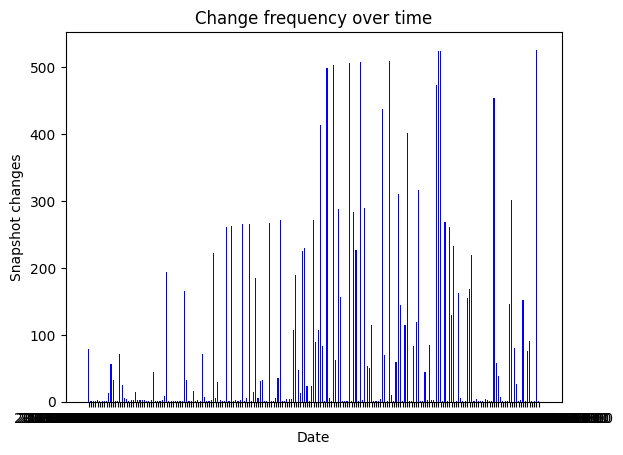

In [16]:
timeline = {}
for record in historical_data:
    if record["CreatedAt"] not in timeline.keys():
        timeline[record["CreatedAt"]] = {}
    timeline[record["CreatedAt"]][record["Href"]] = record

plt.bar([d.isoformat() for d in timeline.keys()], [len(v.keys()) for v in timeline.values()], color = "blue", width=0.5)
plt.xlabel("Date")
plt.ylabel("Snapshot changes")
plt.title("Change frequency over time")
plt.show()